In [2]:
import matplotlib
# !pip install opencv-python
import matplotlib.pyplot as ajeeb
import cv2
import math
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import image as mpimg
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
%matplotlib inline
from scipy import linalg
from scipy.linalg import null_space
# !pip install imageio
# import imageio

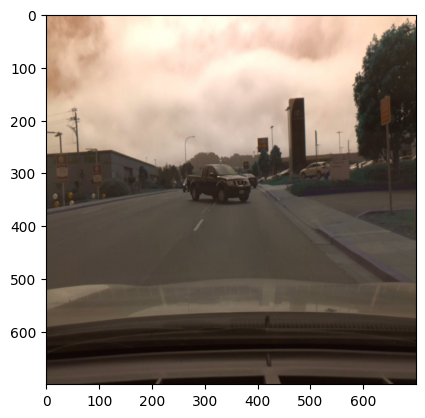

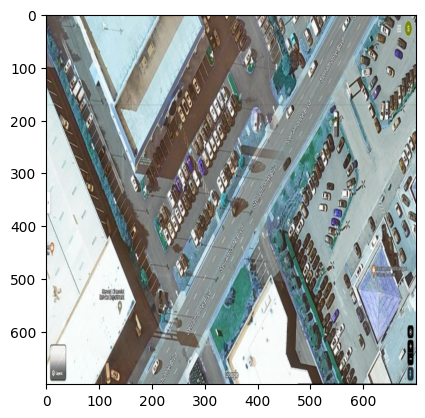

True

In [7]:
# Add your code here
image1 = cv2.imread('original.jpeg')
image2 = cv2.imread('satellite.jpeg')
# resizing images to 700x700 pixels for better display and convinience to mark points
image1 = cv2.resize(image1, (700, 700))
image2 = cv2.resize(image2, (700, 700))
# display
plt.imshow(image1)
plt.show()
plt.imshow(image2)
plt.show()
# save
cv2.imwrite('original.jpg', image1)
cv2.imwrite('satellite.jpg', image2)

In [9]:
def point_reader(img):
    points = []

    def mouse_callback(event, x, y, flags, param):
        if event in [cv2.EVENT_LBUTTONDOWN, cv2.EVENT_RBUTTONDOWN]:
            points.append((x, y))
            print("Point marked at ({}, {})".format(x, y))

    cv2.namedWindow("Image",1)
    cv2.setMouseCallback("Image", mouse_callback)
    while True:
        cv2.imshow("Image", img)

        key = cv2.waitKey(1)

        if key == 27:
            break
    cv2.destroyWindow("Image")
    cv2.waitKey(1)
    cv2.waitKey(1)
    cv2.waitKey(1)
    cv2.waitKey(1)
    
    return np.array(points)

In [ ]:
points1 = point_reader(image1)

In [ ]:
points2 = point_reader(image2)

In [ ]:
def homography_matrix(p1, p2):
    H = []
    for i in range(len(p1)):
        x1, y1 = p1[i][0], p1[i][1]
        x2, y2 = p2[i][0], p2[i][1]
        H.append([x1, y1, 1, 0, 0, 0, -x2*x1, -x2*y1, -x2])
        H.append([0, 0, 0, x1, y1, 1, -y2*x1, -y2*y1, -y2])
    H = np.array(H)
    return H

In [ ]:
u, s, vh = np.linalg.svd(homography_matrix(points2, points1)) # Replace it with your H matrix
vh = np.transpose(vh)
P = vh[:,len(vh[0])-1]

P = np.array([P[0:3], P[3:6], P[6:9]])
print("Homography matrix\n",P)

In [ ]:
# YOUR CODE
img = cv2.warpPerspective(img2, P, ((img2.shape[1] + img1.shape[1]), img2.shape[0]))
img[0:img1.shape[0], 0:img1.shape[1]] = img1
# save
cv2.imwrite('result.jpg', img)
